# Python for Data Science, Level I
### *Session \#7*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Pandas Review

### Warm Ups

---

**Importing pandas:** `import pandas as pd`

In [1]:
import pandas as pd

**Dataframe from Excel sheet:** `df = pd.read_excel("titanic.xlsx")`

In [2]:
df = pd.read_excel('https://github.com/patricks1/python-for-data-science/'
                   'raw/master/Session07/titanic.xlsx')

**Boolean filter on rows:** `df[df['age'] >= 21]`

**Aggregate column with Numpy function:** `df['fare'].mean()`

**Create a new column:** `df['lone_adult_male'] = (df['alone'] == True) & (df['sex'] == 'male')`

**Aggregate column with Numpy function:** `df['fare'].mean()`

## Exercises
---
**1. What was the average fare paid by survivors? What was the average fare among those that didn't survive?**

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
living = df['survived'] == 1
df[living]['fare'].mean()
df[~living]['fare'].mean()

22.117886885245902

**2. Create a new Boolean filter** `minor` **which is** `True` **for passengers who are under 18 years old**

In [5]:
no_age = df['age'].isnull()

minor = (df['age'] < 18)

**3. What was the survival rate of minors aboard the Titanic?**

In [6]:
raw_num = df[minor]['survived'].mean()
pretty_percent = round(raw_num, 4) * 100

print("Percent survived: "+str(pretty_percent))

Percent survived: 53.98


**4. What was the survival rate among those who were NOT minors?**

Hint: You can use the ~ operator to reverse a Boolean filter.

In [7]:
df[~minor]['survived'].mean()

0.36118251928020567

### Extra Credit
---
**1. Create a new column called** `senior` **which is** `True` **for those over 55. What is the survival rate for seniors?**

In [8]:
df['senior'] = (df['age'] > 55)
print(df[df['senior']]['survived'].mean())
print(df[df['senior']]['survived'].sum() / len(df[df['senior']]))

0.3
0.3


## II. Groupby 


### Warm Ups
---
**Get frequency of each unique value in column:** `counts = df['who'].value_counts()`

In [9]:
counts = df['who'].value_counts()

In [10]:
counts

who
man      537
woman    271
child     83
Name: count, dtype: int64

**Grab by row index:** `counts.loc['man']`

In [11]:
counts.loc['man']

537

**Group by a column:** `df.groupby('who')['fare'].mean()`

### Exercises
---
**1. Groupby the** `who` **column and find the average value of** `survived`, **i.e. the rate of survival**

In [12]:
gb = df.groupby("who")['survived']
print(type(gb))
gb.mean()

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

**2. Use a groupby on** `class_df` **to sum up the number of survivors by class**

In [13]:
df.groupby("class")[['survived']].sum()

,survived
class,
First,136
Second,87
Third,119


**3. What about the surivival rate by class? Use** `.mean()` **to aggregate this time instead.**

In [14]:
df.groupby("class")[['survived']].mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


**4. Find the most expensive ticket purchased within each class.** 

Hint: You'll need to create a dataframe from just the `class` and `fare` columns first.

In [15]:
df.groupby("class")['fare'].max()

class
First     512.3292
Second     73.5000
Third      69.5500
Name: fare, dtype: float64

### Extra Credit
---

**1. When performing a groupby, you can use** `.agg()` **instead of the normal Numpy methods like** `.sum()` **or** `.mean()`

**If you use** `.agg()`**, you can apply multiple aggregators at once by giving a list of their names, eg:** `df.groupby('sex').agg(['sum', 'count'])` 

**Do a groupby to find the** `count` **and** `sum` **of the survived column (ie. total number and survivors), broken out by class.**  

In [16]:
class_df = df[['class','survived']]
out = class_df.groupby('class').agg(['sum', 'count'])
out

survived      
            sum count
class                
First       136   216
Second       87   184
Third       119   491

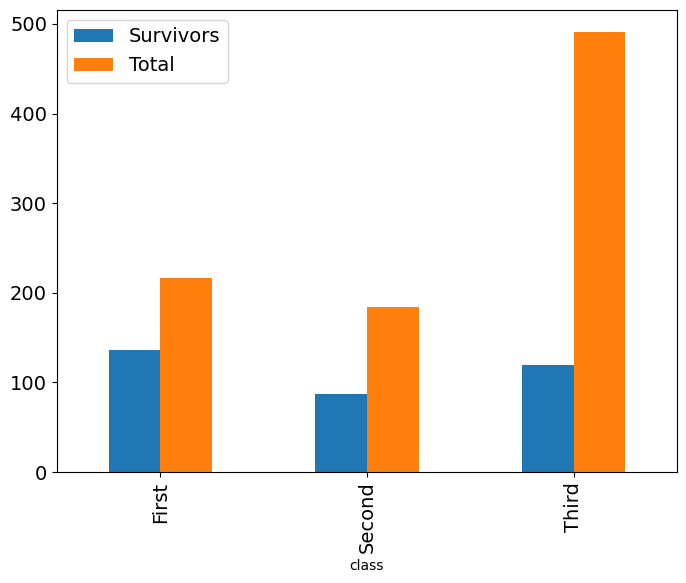

In [17]:
out.plot(kind='bar', 
         figsize=(8,6), 
         fontsize=14).legend(['Survivors', 'Total'],
                             fontsize=14)

## III. Pivot tables


### Warm Ups
---
**Basic pivot table:** `df.pivot_table(values='survived', index='who')`

Note: `pivot_table()` will use the average when combining rows, by default.

In [18]:
df.pivot_table(values='survived', index='who')

,survived
who,
child,0.590361
man,0.163873
woman,0.756458


**Pivot table using different aggregator:** `df.pivot_table(values='survived', index='embark_town', aggfunc='sum')`

In [19]:
df.pivot_table(index='embark_town', 
               values='survived', aggfunc='sum')

,survived
embark_town,
Cherbourg,93
Queenstown,30
Southampton,217


If we don't specify `values`, the pivot table summarizes everything with numerical values.

In [20]:
df.pivot_table(index='embark_town', aggfunc='sum')

,adult_male,age,alive,alone,class,deck,embarked,fare,parch,pclass,senior,sex,sibsp,survived,who
embark_town,,,,,,,,,,,,,,,
Cherbourg,90,4005.92,yesyesyesnonoyesnoyesyesnoyesnoyesnonononoyesn...,85,FirstSecondThirdThirdFirstFirstFirstThirdThird...,CBDBADBFBACBBADDCBDBCECBECBEDBECDCCDBBDCBBCCAC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,10072.2962,61,317,11,femalefemalefemalemalemalefemalemalemalefemale...,65,93,womanchildwomanmanmanwomanmanmanchildmanchildm...
Queenstown,37,786.50,nonoyesyesyesyesnoyesyesyesnononoyesnoyesnonoy...,57,ThirdThirdThirdThirdThirdThirdThirdThirdThirdT...,CECF,QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ...,1022.2543,13,224,3,malemalefemalefemalefemalefemalemalefemalefema...,33,30,manchildchildwomanwomanwomanmanwomanwomanwoman...
Southampton,410,16312.75,noyesyesnononoyesyesyesnononoyesyesnonoyesyesn...,393,ThirdThirdFirstThirdFirstThirdThirdThirdFirstT...,CEGCDACCCFFCEDCEDDCFCEBFAFGCCDGCBEBCCDACCCCDCC...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,17439.3988,266,1514,25,malefemalefemalemalemalemalefemalefemalefemale...,368,217,manwomanwomanmanmanchildwomanchildwomanmanmanc...


We can specify multiple `values` categories.

In [21]:
df.pivot_table(index='embark_town', values=['alone','survived'],
               aggfunc='sum')

,alone,survived
embark_town,,
Cherbourg,85,93
Queenstown,57,30
Southampton,393,217


We can also break out the `values` by a `columns` specification.

In [22]:
df.pivot_table(index='embark_town', columns='sex', 
               values=['alone','survived'], aggfunc='sum')

alone      survived     
sex         female male   female male
embark_town                          
Cherbourg       25   60       64   29
Queenstown      27   30       27    3
Southampton     72  321      140   77

**Pivot table divided out by column values**:  
`pivot_df = df.pivot_table(values='survived', index='who', columns='class')`

In [23]:
pivot_df = df.pivot_table(values='survived', index='who', 
                          columns='class', margins=True)
pivot_df

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


**Grab by row and column index:** `pivot_df.loc['child', 'Second']`

In [24]:
pivot_df.loc['child', 'Second']

1.0

### Exercises
---
**1. Create a pivot table to show survival rates based on where passengers embarked from.**

In [25]:
df.pivot_table(values='survived', index='embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


**2. Create a pivot table that shows a total count of surviving passengers from each** `embark_town`

In [26]:
df.pivot_table(values='survived', index='embark_town', aggfunc='count')

,survived
embark_town,
Cherbourg,168
Queenstown,77
Southampton,644


**3.  Let's find average ticket prices prices. Create a pivot table for** `fare`, **with index broken down by** `class` **and columns broken down by** `who` 

In [27]:
df.pivot_table(values='fare', index='class', columns='who')

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


**4. Plot the ticket prices dataframe as a bar chart! To do so, just add** `.plot(kind="bar")`

<Axes: xlabel='class'>

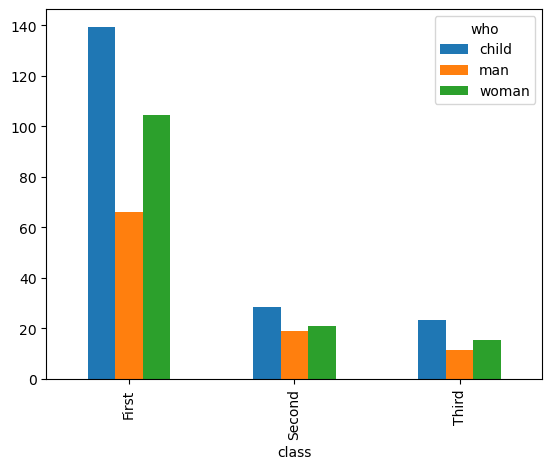

In [28]:
output = df.pivot_table('fare', index='class', columns='who')
output.plot(kind="bar")

### Extra Credit
---

**1. The index parameter of** `.pivot_table()` **can also take a list for the** `index` **argument. This will generate a  *heirarchical* index. A heirarchical index subdivides by multiple indices, resulting in a more fine-grained breakdown.**

**Create a pivot table to capture survival rate, with** `index=["embark town", "who"]` **and** `columns="class"`

Note: To fetch from a heirchical index, you have to specify a value for both columns in the index: `df.loc[('Cherbourg', 'man'), 'First']`

In [29]:
df.pivot_table(values='survived', index=['embark_town', 'who'], 
               columns='class')

class                 First    Second     Third
embark_town who                                
Cherbourg   child       NaN  1.000000  0.733333
            man    0.404762  0.111111  0.205128
            woman  0.976744  1.000000  0.500000
Queenstown  child       NaN       NaN  0.200000
            man    0.000000  0.000000  0.085714
            woman  1.000000  1.000000  0.718750
Southampton child  0.833333  1.000000  0.342105
            man    0.328947  0.078652  0.110204
            woman  0.977778  0.898305  0.385714

## IV. Visualize Population Growth

**Load the file** `countries_population_from_1955_to_2020.csv`**, which is in your current working directory, into a Pandas dataframe:**

In [30]:
pop_df = pd.read_csv('https://github.com/patricks1/python-for-data-science/'
                     'raw/master/Session07/'
                     'countries_population_from_1955_to_2020.csv')
print(pop_df.shape)
pop_df.sample(10)

(4195, 14)


,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
935,1955,Cameroon,4706995,1.79,79994,0.0,20.4,5.49,10,11.4,537904.0,0.17,2773019936,72
2722,2016,Bahrain,1425792,3.93,53941,47800.0,31.4,2.10,"1,876",89.1,1269684.0,0.02,7464022049,152
27,1995,India,963922588,1.99,18128958,-110590.0,21.8,3.83,324,26.5,255558824.0,16.78,5744212979,2
2891,1985,Fiji,711775,2.30,15294,-2535.0,20.3,3.80,39,38.5,274154.0,0.01,4870921740,155
96,2010,Brazil,195713635,1.01,1917306,0.0,29.2,1.86,23,84.8,165969018.0,2.81,6956823603,5
3617,2019,Isle of Man,84584,0.60,507,NaN,NaN,NaN,148,53.2,45019.0,0.00,7713468100,202
721,2019,Saudi Arabia,34268528,1.68,565772,134979.0,30.3,2.64,16,83.8,28700362.0,0.44,7713468100,41
1066,2016,Mali,17965443,3.02,526665,-40000.0,16.0,6.26,15,40.9,7338892.0,0.24,7464022049,62
2385,1995,Eritrea,2204222,-0.49,-10886,-62954.0,15.6,6.30,22,31.6,695721.0,0.04,5744212979,140
2678,1970,Slovenia,1669581,0.49,8030,-2990.0,31.0,2.27,83,37.0,617804.0,0.05,3700437046,134


**Make a new df of just the year, country, and population columns:**

In [31]:
pop_3c_df = pop_df[ ["Year", "Country", "Population" ] ]
print(pop_3c_df.shape)

(4195, 3)


**"Pivot" the data so that each country is its own column**  
<span style="background-color:limegreen">Name the new dataframe `pop_piv_df`.</span>  
(This is required for the bar chart race, which makes "race bars" out of each column)

In [32]:
pop_piv_df = pop_3c_df.pivot_table(index="Year", columns="Country", 
                                   values="Population")
print(pop_piv_df.shape)
display(pop_piv_df.sample(10))

(18, 235)


Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2015,34413603.0,2890513.0,39728025.0,55812.0,78011.0,27884381.0,14279.0,93566.0,43075416.0,2925553.0,...,3412009.0,30929557.0,271130.0,30081829.0,92677076.0,12266.0,526216.0,26497889.0,15879361.0,13814629.0
2010,29185507.0,2948023.0,35977455.0,56079.0,84449.0,23356246.0,13438.0,88028.0,40895752.0,2877319.0,...,3359275.0,28515909.0,236211.0,28439940.0,87967651.0,12689.0,480274.0,23154855.0,13605984.0,12697723.0
2020,38928346.0,2877797.0,43851044.0,NaN,NaN,32866272.0,NaN,97929.0,45195774.0,2963243.0,...,3473730.0,33469203.0,307145.0,28435940.0,97338579.0,NaN,597339.0,29825964.0,18383955.0,14862924.0
1980,13356511.0,2682690.0,19221665.0,32646.0,36067.0,8341289.0,7285.0,61865.0,27896528.0,3099754.0,...,2915389.0,15898757.0,115597.0,15182611.0,54281846.0,11231.0,150877.0,7941898.0,5851825.0,7408624.0
2005,25654277.0,3086810.0,33149724.0,59562.0,78867.0,19433602.0,12453.0,81465.0,38892931.0,2981269.0,...,3321803.0,26427789.0,209282.0,26432447.0,83832661.0,14939.0,437515.0,20107409.0,11856247.0,12076699.0
2018,37171921.0,2882740.0,42228408.0,55465.0,77006.0,30809787.0,14731.0,96286.0,44361150.0,2951745.0,...,3449285.0,32476244.0,292680.0,28887118.0,95545962.0,11661.0,567402.0,28498683.0,17351708.0,14438802.0
1970,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0
2017,36296113.0,2884169.0,41389189.0,55620.0,77001.0,29816766.0,14584.0,95426.0,43937140.0,2944791.0,...,3436641.0,31959785.0,285510.0,29402484.0,94600648.0,11900.0,552615.0,27834819.0,16853599.0,14236595.0


**Sort the cols A-Z and sort the index (rows) in ascending order:**

In [33]:
pop_piv_df.sort_values(list(pop_piv_df.columns), inplace=True)
pop_piv_df = pop_piv_df.sort_index()
display(pop_piv_df)

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1955,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,...,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,...,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,...,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0
1980,13356511.0,2682690.0,19221665.0,32646.0,36067.0,8341289.0,7285.0,61865.0,27896528.0,3099754.0,...,2915389.0,15898757.0,115597.0,15182611.0,54281846.0,11231.0,150877.0,7941898.0,5851825.0,7408624.0
1985,11938208.0,2969672.0,22431502.0,39519.0,44600.0,9961997.0,7293.0,61786.0,30216279.0,3335940.0,...,3011519.0,18061284.0,129984.0,17319520.0,60896721.0,13622.0,182421.0,9572175.0,6923149.0,8877489.0
1990,12412308.0,3286073.0,25758869.0,47347.0,54509.0,11848386.0,8899.0,62528.0,32618651.0,3538171.0,...,3109601.0,20398348.0,146573.0,19632665.0,67988862.0,13800.0,217258.0,11709993.0,8036845.0,10432421.0
1995,18110657.0,3112936.0,28757785.0,53161.0,63850.0,13945206.0,9866.0,68670.0,34828170.0,3217348.0,...,3224281.0,22791026.0,168158.0,21931084.0,74910461.0,14149.0,255634.0,14913315.0,9096607.0,11410714.0


**Data is now prepped, so you can run the following Bar Chart Race code.**

In [34]:
import warnings
import bar_chart_race as bcr

with warnings.catch_warnings():
    # Silence UserWarnings for this block of code. 
    warnings.simplefilter('ignore', category = UserWarning)
    
    bcr.bar_chart_race(
        df = pop_piv_df,
        filename='top-30-countries-by-pop-bar-chart-race.mp4',
        orientation='h',
        sort='desc',
        n_bars=30,
        fixed_order=False,
        fixed_max=True,
        steps_per_period=24,
        period_length=4000,
        interpolate_period=False,
        label_bars=True,
        bar_size=.90,
        period_label={'x': .99, 'y': .25, 'ha': 'right', 'va':'center'},
        period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                 's': f'Population\n {v.nlargest(39).sum():,.0f}',
                 'ha': 'right', 'size': 10},
        figsize=(6.5,5),
        dpi=225,
        cmap='dark12',
        # cmap='viridis',
        title='Top 30 Countries by Population: 1955-2020',
        title_size='',
        bar_label_size=5,
        tick_label_size=5,
        shared_fontdict={'color' : '.1'},
        scale='linear',
        writer=None,
        fig=None,
        bar_kwargs={'alpha': .7},
        filter_column_colors=True)
print('Done!')

Done!
